# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing your libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Importing the data
path= r"C:\Users\Jeet\Desktop\task6"

In [13]:
data = pd.read_csv(os.path.join(path,'Rent_data_time_series.csv'))

In [14]:
data.head(5)

,Construction year,Average of Total Rent
0,1921,592
1,1922,856
2,1923,593
3,1924,687
4,1925,646


In [15]:
data.shape

(100, 2)

In [16]:
data.columns

Index(['Construction year', 'Average of  Total Rent'], dtype='object')

In [17]:
type(data)

pandas.core.frame.DataFrame

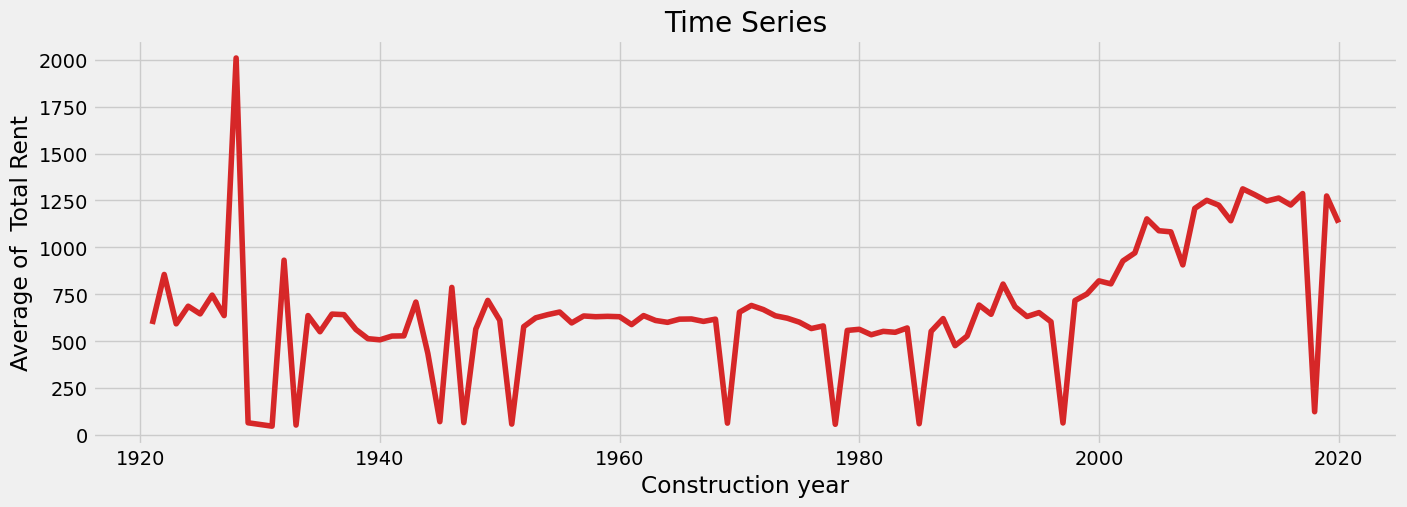

In [22]:
def plot_data(data, x, y, title='Time Series',xlabel='Construction year', ylabel='Average of  Total Rent', dpi=100):
    plt.figure(figsize=(15,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_data(data, x=data['Construction year'], y=data['Average of  Total Rent'],title='Time Series')


### 3. Time-series analysis: decomposition

In [32]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data['Average of  Total Rent'], model='additive', period=1)

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

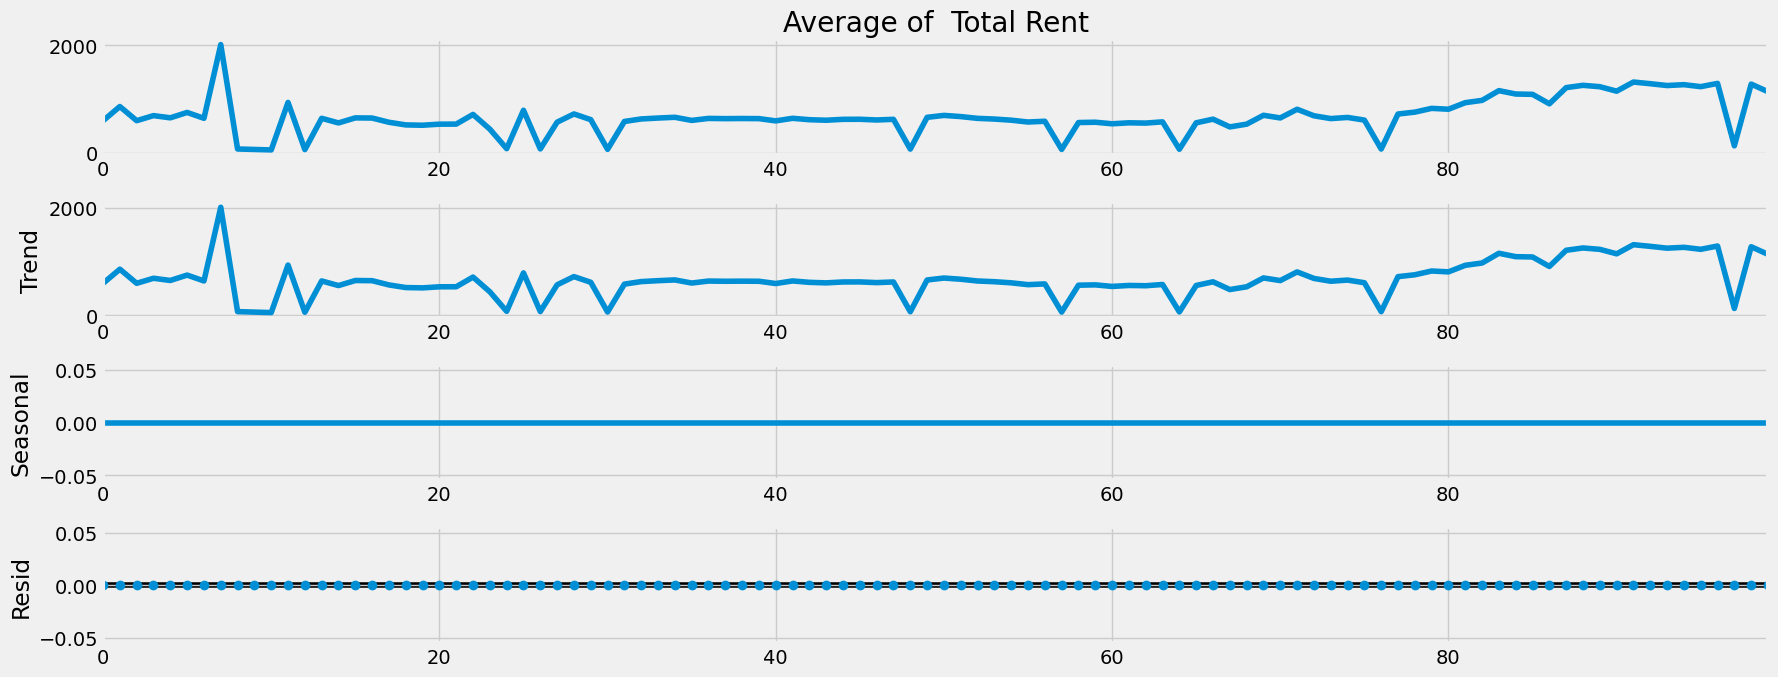

In [34]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [47]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Average of  Total Rent'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.894526
p-value                         0.334641
Number of Lags Used             3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


The test statistic of -1.894526 is larger than the critical value (5%) of -2.892152, 
meaning the null hypothesis cannot be rejected.

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 50 must be < 50.

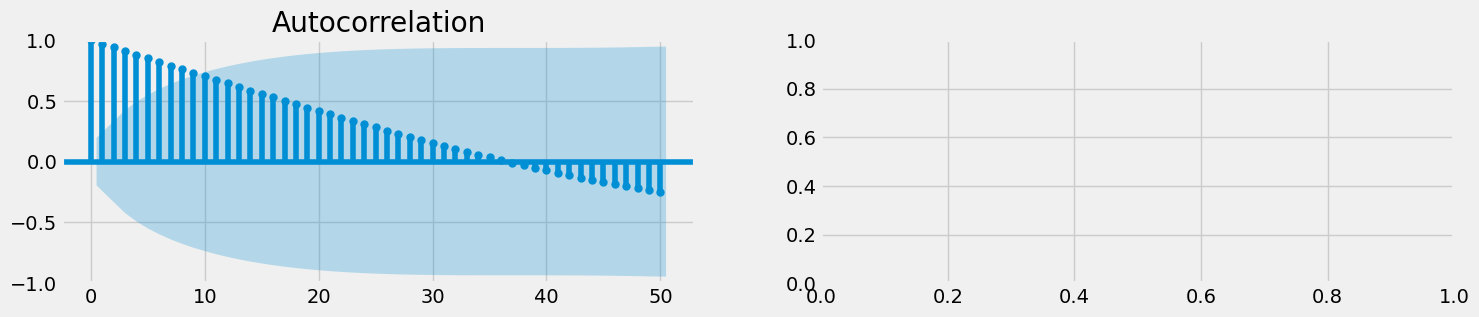

In [49]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['Construction year'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['Construction year'].tolist(), lags=50, ax=axes[1])

### 5. Stationarizing the Data

In [40]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [41]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [42]:
data_diff.head()

,Construction year,Average of Total Rent
1,1.0,264.0
2,1.0,-263.0
3,1.0,94.0
4,1.0,-41.0
5,1.0,100.0


In [43]:
data_diff.columns

Index(['Construction year', 'Average of  Total Rent'], dtype='object')

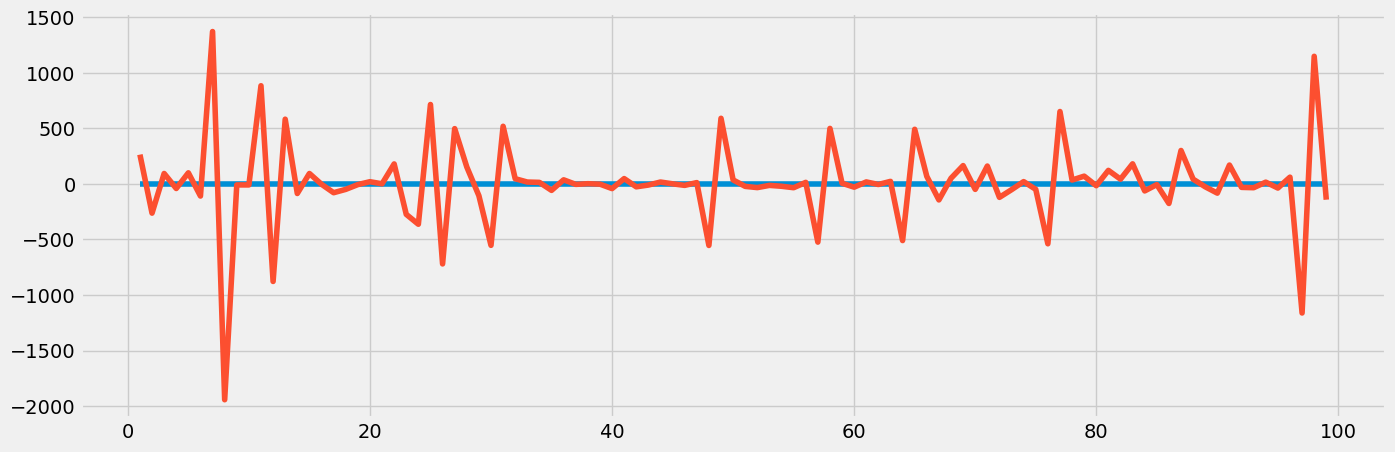

In [44]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [52]:
dickey_fuller(data_diff['Average of  Total Rent'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.092783e+01
p-value                        9.997406e-20
Number of Lags Used            2.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


LinAlgError: Singular matrix

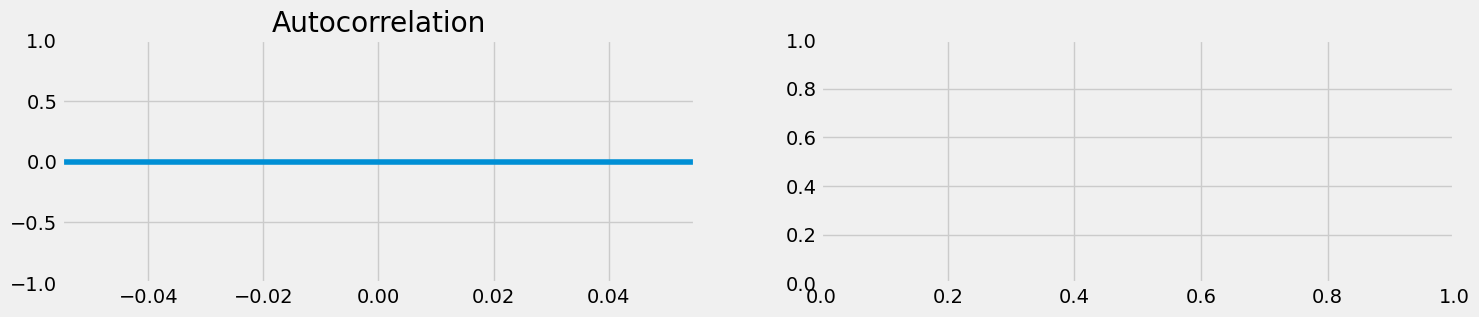

In [54]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_diff['Construction year'].tolist(), lags=20, ax=axes[0])
plot_pacf(data_diff['Construction year'].tolist(), lags=20, ax=axes[1])

In [ ]:
The autocorrelation plot has improved